In [1]:
import pygimli as pg
from pygimli.physics import TravelTimeManager
import pygimli.physics.traveltime as tt
import pygimli.meshtools as mt

In [3]:
data = tt.load("L2.txt")
mgr = TravelTimeManager()


#data.set('err',  mgr.estimateError(data['t'],errLevel=0.03))

mesh=mgr.createMesh(data,quality=32,paraDX=0.05,paraMaxCellSize=32, paraBoundary=0.2
                  ,paraDepth = 80,balanceDepth=False)


23/03/23 - 18:18:22 - pyGIMLi - INFO - Found 1 regions.
23/03/23 - 18:18:22 - pyGIMLi - ERROR - <class 'pygimli.physics.traveltime.TravelTimeManager.TravelTimeManager'>.checkError(C:\Users\hangchen\Anaconda3\envs\pg\lib\site-packages\pygimli\physics\traveltime\TravelTimeManager.py:87)
DataContainer has no "err" values. Fallback to 3%
23/03/23 - 18:18:22 - pyGIMLi - INFO - Creating forward mesh from region infos.
23/03/23 - 18:18:22 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
23/03/23 - 18:18:22 - pyGIMLi - INFO - Create gradient starting model. 500: 6000
23/03/23 - 18:18:22 - pyGIMLi - INFO - Created startmodel from forward operator: [0.00113977 0.00111495 0.00103967 ... 0.00018959 0.0001957  0.00018627]
23/03/23 - 18:18:22 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.traveltime.modelling.TravelTimeDijkstraModelling object at 0x000001DFD0D2F540>
Data transformation: <pgcore._pygimli_.RTrans object at 0x000001DFD0D2F900>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001DFD0CA5640>
min/max (data): 0.0041/0.1
min/max (error): 3%/3%
min/max (start model): 1.7e-04/0.002
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 7.31 (dPhi = 53.25%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 4.79 (dPhi = 20.49%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² = 4.6 (dPhi = 3.49%) lam: 100.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² = 4.5 (dPhi = 1.07%) lam: 100.0
####################

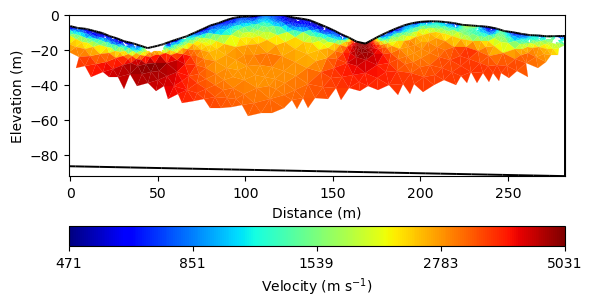

In [4]:
mgr.setMesh(mesh)

mgr.invert(data, vTop=500,vBottom=6000,lam=100,zWeight=0.5,
          verbose=1,limits=[400., 8000.], useGradient=True,isReference=False)

ax, cbar = mgr.showResult(logScale=True,cMap='jet',coverage=mgr.standardizedCoverage(),
                         label='Velocity (m s$^{-1})$',xlabel='Distance (m)',
                         ylabel='Elevation (m)')